In [20]:
import geopandas as gpd
import pandas as pd
import os
import numpy as np

In [21]:
gdf = gpd.read_file('/Users/guilhermeiablonovski/Dropbox (SDSN)/SDG Geospatial Indicators Project/sdg-accessibility/data/final_by_continent/world_cities_raw_weightedpoi.gpkg')

In [22]:
world = gpd.read_file('/Users/guilhermeiablonovski/Dropbox (SDSN)/SDG Geospatial Indicators Project/sdg-accessibility/data/world-administrative-boundaries-sdsn/world-administrative-boundaries-sdsn.shp')

In [23]:
affiliated = gpd.read_file('/Users/guilhermeiablonovski/Dropbox (SDSN)/SDG Geospatial Indicators Project/sdg-accessibility/data/world-administrative-boundaries-sdsn/world-admin-simplified-affiliated.gpkg')

In [24]:
gdf = gdf.rename(columns={"CTR_MN_ISO": "ISO_CC"})
gdf = gdf.merge(world[['ISO_CC','color_code']], on='ISO_CC')
gdf = gdf.rename(columns={"color_code": "ISO_AC"})

In [25]:
#Don't do this as the cities in borders might fall to the wrong side
#gdf = gdf.sjoin(world, how="inner")

In [26]:
#gdf = gdf[gdf['AREA']>15]

In [27]:
w_health = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.w_health, weights=x.POP_2015)).rename("w_health")
w_community = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.w_community, weights=x.POP_2015)).rename("w_community")
w_education = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.w_education, weights=x.POP_2015)).rename("w_education")
w_food = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.w_food, weights=x.POP_2015)).rename("w_food")
w_nightlife = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.w_nightlife, weights=x.POP_2015)).rename("w_nightlife")
w_mobility = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.w_mobility, weights=x.POP_2015)).rename("w_mobility")
w_active = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.w_active, weights=x.POP_2015)).rename("w_active")
w_pois = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.w_pois, weights=x.POP_2015)).rename("w_pois")

weighted = pd.concat([w_health, w_community, w_education, w_food, w_nightlife, w_mobility, w_active, w_pois], axis=1)
weighted


,w_health,w_community,w_education,w_food,w_nightlife,w_mobility,w_active,w_pois
ISO_AC,,,,,,,,
AFG,19.259561,19.868610,18.696467,21.308484,39.574263,26.959164,24.095524,21.657486
AGO,19.742285,24.313638,20.947180,17.925837,30.480649,41.510844,33.467258,26.143966
ALB,8.112797,13.984221,8.783360,5.555529,8.779769,7.820064,11.784464,9.283907
ARE,16.987889,22.801063,20.764710,9.740277,38.738609,35.947614,20.864591,20.937090
ARG,8.066937,10.028059,7.823742,9.224575,21.330045,12.549788,8.022708,9.220176
...,...,...,...,...,...,...,...,...
XXX,9.526183,5.666605,6.713845,7.379658,21.046293,19.295091,14.102087,10.391216
YEM,6.787477,7.160927,8.777077,7.666411,20.074550,25.522829,19.299671,12.464170
ZAF,26.013957,21.868114,15.583605,20.087474,40.760224,33.340772,28.632071,24.108352


In [28]:
c_health = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.c_health, weights=x.POP_2015)).rename("c_health")
c_community = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.c_community, weights=x.POP_2015)).rename("c_community")
c_education = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.c_education, weights=x.POP_2015)).rename("c_education")
c_food = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.c_food, weights=x.POP_2015)).rename("c_food")
c_nightlife = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.c_nightlife, weights=x.POP_2015)).rename("c_nightlife")
c_mobility = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.c_mobility, weights=x.POP_2015)).rename("c_mobility")
c_active = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.c_active, weights=x.POP_2015)).rename("c_active")
c_pois = gdf.groupby('ISO_AC').apply(lambda x: np.average(x.c_pois, weights=x.POP_2015)).rename("c_pois")

people = pd.concat([c_health, c_community, c_education, c_food, c_nightlife, c_mobility, c_active, c_pois], axis=1)
people


,c_health,c_community,c_education,c_food,c_nightlife,c_mobility,c_active,c_pois
ISO_AC,,,,,,,,
AFG,0.475791,0.458050,0.475609,0.432812,0.149228,0.340053,0.319918,0.312116
AGO,0.494437,0.400929,0.477741,0.557659,0.275518,0.106890,0.226137,0.223346
ALB,0.860983,0.648135,0.835308,0.926008,0.839094,0.855809,0.730071,0.824607
ARE,0.607486,0.420992,0.497408,0.820155,0.194961,0.271977,0.461541,0.381911
ARG,0.873952,0.801948,0.885547,0.815569,0.448220,0.698822,0.886539,0.845353
...,...,...,...,...,...,...,...,...
XXX,0.825074,0.941155,0.905605,0.877559,0.442504,0.531746,0.668288,0.786336
YEM,0.922071,0.900798,0.852709,0.876380,0.568086,0.310277,0.478308,0.733979
ZAF,0.348195,0.457486,0.652586,0.485164,0.149131,0.246649,0.339681,0.293133


In [29]:
weighted = weighted.merge(people, on='ISO_AC')

In [30]:
weighted

,w_health,w_community,w_education,w_food,w_nightlife,w_mobility,w_active,w_pois,c_health,c_community,c_education,c_food,c_nightlife,c_mobility,c_active,c_pois
ISO_AC,,,,,,,,,,,,,,,,
AFG,19.259561,19.868610,18.696467,21.308484,39.574263,26.959164,24.095524,21.657486,0.475791,0.458050,0.475609,0.432812,0.149228,0.340053,0.319918,0.312116
AGO,19.742285,24.313638,20.947180,17.925837,30.480649,41.510844,33.467258,26.143966,0.494437,0.400929,0.477741,0.557659,0.275518,0.106890,0.226137,0.223346
ALB,8.112797,13.984221,8.783360,5.555529,8.779769,7.820064,11.784464,9.283907,0.860983,0.648135,0.835308,0.926008,0.839094,0.855809,0.730071,0.824607
ARE,16.987889,22.801063,20.764710,9.740277,38.738609,35.947614,20.864591,20.937090,0.607486,0.420992,0.497408,0.820155,0.194961,0.271977,0.461541,0.381911
ARG,8.066937,10.028059,7.823742,9.224575,21.330045,12.549788,8.022708,9.220176,0.873952,0.801948,0.885547,0.815569,0.448220,0.698822,0.886539,0.845353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XXX,9.526183,5.666605,6.713845,7.379658,21.046293,19.295091,14.102087,10.391216,0.825074,0.941155,0.905605,0.877559,0.442504,0.531746,0.668288,0.786336
YEM,6.787477,7.160927,8.777077,7.666411,20.074550,25.522829,19.299671,12.464170,0.922071,0.900798,0.852709,0.876380,0.568086,0.310277,0.478308,0.733979
ZAF,26.013957,21.868114,15.583605,20.087474,40.760224,33.340772,28.632071,24.108352,0.348195,0.457486,0.652586,0.485164,0.149131,0.246649,0.339681,0.293133


In [31]:
#Calculating representativity
all_cities = gpd.read_file('/Users/guilhermeiablonovski/Dropbox (SDSN)/SDG Geospatial Indicators Project/sdg-accessibility/data/GHS_STAT_UCDB2015MT_GLOBE_R2019A/GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_2_2.gpkg')
all_cities = all_cities.rename(columns={"CTR_MN_ISO": "ISO_CC"})
all_cities = all_cities.merge(world[['color_code','ISO_CC']], on='ISO_CC')
all_cities = all_cities.rename(columns={"color_code": "ISO_AC"})
urban_pop = all_cities.groupby('ISO_AC')['P15'].sum()
repr_urban_pop = gdf.groupby('ISO_AC')['P15'].sum().rename('R_P15')
represent_pop = pd.concat([urban_pop, repr_urban_pop], axis=1)
represent_pop['rep_pop'] = represent_pop['R_P15']/represent_pop['P15']
represent_pop

,P15,R_P15,rep_pop
ISO_AC,,,
AFG,1.337426e+07,5.524685e+06,0.413084
AGO,1.692620e+07,9.626220e+06,0.568717
ALB,1.151947e+06,1.151947e+06,1.000000
ARE,6.883021e+06,6.883021e+06,1.000000
ARG,2.791193e+07,2.791193e+07,1.000000
...,...,...,...
XXX,3.891989e+06,3.891989e+06,1.000000
YEM,1.371318e+07,6.312341e+06,0.460312
ZAF,2.530057e+07,1.881965e+07,0.743843


In [32]:
urban_area = all_cities.groupby('ISO_AC')['AREA'].sum()
repr_urban_area = gdf.groupby('ISO_AC')['AREA'].sum().rename('R_AREA')
represent_area = pd.concat([urban_area, repr_urban_area], axis=1)
represent_area['rep_area'] = represent_area['R_AREA']/represent_area['AREA']
represent_area

,AREA,R_AREA,rep_area
ISO_AC,,,
AFG,1271.0,450.0,0.354052
AGO,1877.0,1093.0,0.582312
ALB,208.0,208.0,1.000000
ARE,1309.0,1309.0,1.000000
ARG,5170.0,5170.0,1.000000
...,...,...,...
XXX,714.0,714.0,1.000000
YEM,921.0,539.0,0.585233
ZAF,6580.0,4851.0,0.737234


In [33]:
countries = affiliated.merge(weighted, left_on='ISO_CC', right_index=True)
countries

,iso3,status,color_code,name,continent,region,iso_3166_1,french_sho,COUNTRY,COUNTRY_3,...,w_active,w_pois,c_health,c_community,c_education,c_food,c_nightlife,c_mobility,c_active,c_pois
0,MNG,Member State,MNG,Mongolia,Asia,Eastern Asia,MN,Mongolie,None,Mongolia,...,23.173893,13.530497,0.915589,0.377663,0.687548,0.972666,0.328810,0.743908,0.419725,0.613694
1,ESP,Member State,ESP,Spain,Europe,Southern Europe,ES,Espagne,None,Spain,...,5.908290,5.721285,0.901758,0.889060,0.913531,0.951367,0.850890,0.945438,0.925076,0.933152
2,CYP,Member State,CYP,Cyprus,Asia,Western Asia,CY,Chypre,None,Cyprus,...,9.711970,8.312973,0.906669,0.893889,0.889112,0.972000,0.590517,0.724196,0.813066,0.912640
4,COD,Member State,COD,Democratic Republic of the Congo,Africa,Middle Africa,CD,République démocratique du Congo,None,Congo DRC,...,34.086470,21.215393,0.798426,0.748165,0.820729,0.554757,0.332284,0.095545,0.200292,0.272176
5,GNB,Member State,GNB,Guinea-Bissau,Africa,Western Africa,GW,Guinée-Bissau,None,Guinea-Bissau,...,44.909183,27.350759,0.415722,0.305298,0.354235,0.396073,0.292053,0.146409,0.095866,0.209841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,DNK,Member State,DNK,Denmark,Europe,Northern Europe,DK,Danemark,None,Denmark,...,6.447308,5.793439,0.827185,0.951427,0.954931,0.991492,0.838180,0.983182,0.936877,0.975413
202,BEL,Member State,BEL,Belgium,Europe,Western Europe,BE,Belgique,None,Belgium,...,7.689292,6.200130,0.885556,0.925109,0.908938,0.956043,0.801511,0.987283,0.900501,0.951755
204,ISR,Member State,ISR,Israel,Asia,Western Asia,IL,Israël,None,Israel,...,9.594877,8.593047,0.776464,0.817195,0.849312,0.890313,0.473648,0.991072,0.838575,0.876530
205,LBY,Member State,LBY,Libyan Arab Jamahiriya,Africa,Northern Africa,LY,Libye,None,Libya,...,24.682735,16.687627,0.804864,0.891843,0.733495,0.840620,0.108841,0.179095,0.366784,0.480895


In [34]:
countries = countries.merge(represent_area, left_on='ISO_CC', right_index=True)
countries = countries.merge(represent_pop, left_on='ISO_CC', right_index=True)
countries['representativity_index'] = (countries['rep_area']+countries['rep_pop'])/2


<AxesSubplot:>

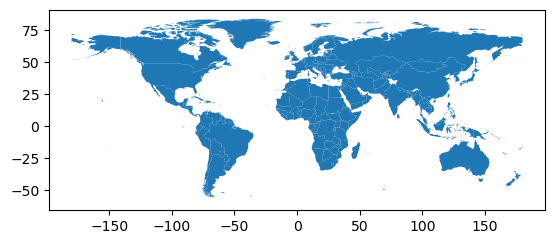

In [35]:
%matplotlib inline
countries.plot()

In [36]:
#Filter for OECD countries
#countries = countries[countries['OECD']=='Yes']

In [37]:

countries.to_file('data/final_by_continent/world_countries_raw_weightedpoi.geojson')

In [19]:
countries.to_file('data/final_by_continent/world_countries_raw_weightedpoi.csv')

SchemaError: Attempt to create field AREA, but a field with this name already exists.